# S03 T02: Visualització gràfica de Múltiples variables #

Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.

## Nivell 1 ##

### - Exercici 1 ###

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

Scatter Plots o Gráficos de Puntos pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales.

Usaremos el dataset tips, selecionaremos unas cuantas variables.

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

tips = pd.read_csv('Examining-Data/tips.csv', sep = ',', encoding = 'utf-8')
tips.dataframeName = 'tips.csv'
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

In [7]:
tips.ndim

2

In [8]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


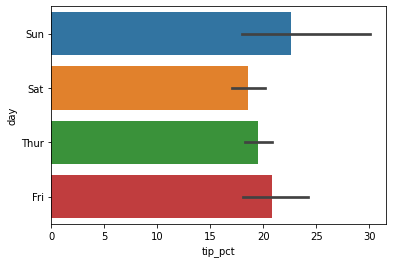

In [11]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

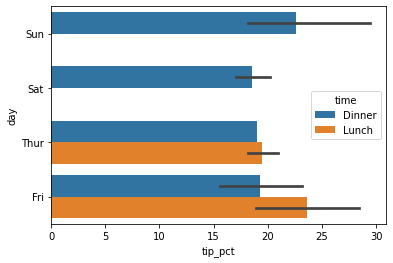

In [12]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [13]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [14]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [15]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [16]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

Compare both Equations above. 

* What does $x_1$ correspond to ?,   

𝑥1 corresponde al número de caracteres de la primera cuenta de la muestra (16.99, en €)

* and **$x_2$** ?   

𝑥2 al número de caracteres en el segunda cuenta (10.34, en €)

* Can you infer a general meaning to what $x_i$ might represent?

𝑥𝑖 corresponde a la cantidad de cuentas totales 𝑖𝑡ℎ en el conjunto de datos.

* What was $n$ in this sample of emails?

El tamaño de la muestra fue 𝑛 = 244.


In [18]:
tips.total_bill.mean().round(3)

19.786

<span style=color:red><b><u>EXERCISE - 3.2</u></b></span>

The <span style=color:blue>average</span> number of characters across all bill (<span style=color:blue><b>population</b></span>) can be estimated using the <span style=color:blue><b>sample data</b></span>.   

Based on the <span style=color:blue>sample</span> of <b>50</b> $bills$, what would be a reasonable estimate of <span style=color:blue><b>$\mu_x$</b></span>, the <span style=color:blue><b>mean</b></span> number of characters in all bills in the bills dataset? (Recall that $bills50$ is a sample from $bill$.)

The <span style=color:blue>sample mean</span>, <b>19.786</b>, may provide a reasonable estimate of <span style=color:blue>$\mu_x$</span>.   

While this number will not be perfect, it provides a <span style=color:blue><em><b>point estimate</b></em></span> of the <span style=color:blue>population mean</span>.

In [26]:
tips.total_bill.mean()- tips.total_bill.std()

10.883530668093965

### <span style=color:darkred>Variance</span>

In [21]:
tips.total_bill.iloc[[1], ]

1    10.34
Name: total_bill, dtype: float64

### <span style=color:darkred>Standard Deviation</span>

In [22]:
tips.total_bill.std().round(3)

8.902

<span style=color:red><b><u>EXERCISE - 3.6</u></b></span> 

A good <span style=color:blue>description of the shape of a distribution</span> should include <span style=color:blue>modality</span> and whether the <span style=color:blue>distribution</span> is <span style=color:blue>symmetric or skewed</span> to one side. 

Explore the figure as an example, explain why such a description is important :

![Std.jpg](attachment:Std.jpg)

Text(0.5, 0, '# Bills (in €)')

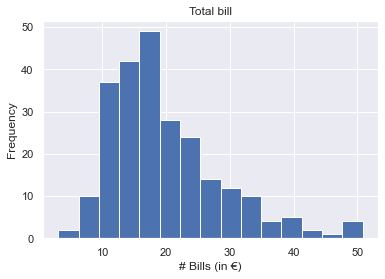

In [30]:
tips.hist(['total_bill'], bins=15)
plt.title('Total bill')
plt.ylabel('Frequency')
plt.xlabel('# Bills (in €)')

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the <b>total_bills</b> variable using the histogram display above. 

The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context: the <b>number of characters</b> in emails. Also note any especially <b>unusual cases</b>.

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

The distribution of bill character counts is <b>unimodal</b> and very <b>strongly skewed to the high end</b>. Many of the counts fall near the <b>Mean at 19.786</b>, and most fall within <b>one Standard Deviation (8.902)</b> of the <b>mean</b>. There is <b>one exceptionally long bill</b> with about 65,000 characters.

In [25]:
tips.total_bill.std().round(2)

8.9

## <span style=color:red>Ejercicio Practico -- Scatter Plots</span>

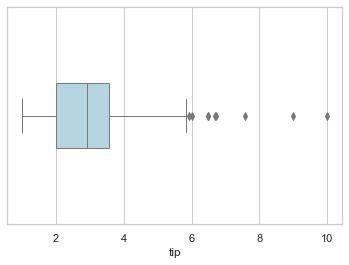

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

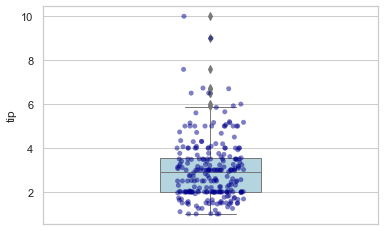

In [18]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

Una Variable: 1 Numérica = 'tip_pct'

In [19]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

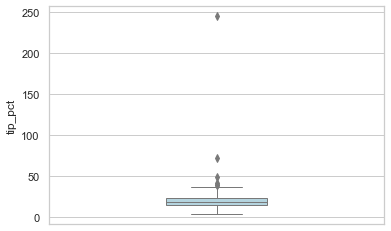

In [20]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

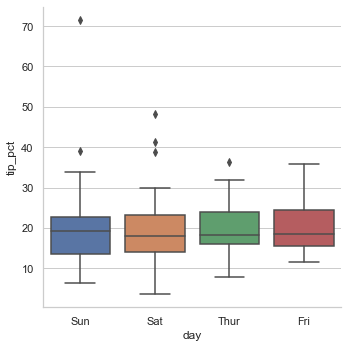

In [21]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

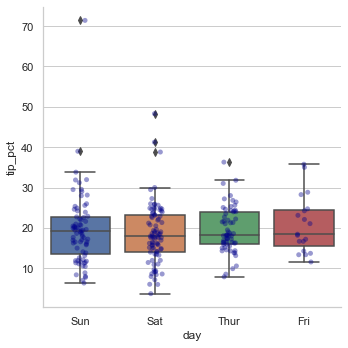

In [22]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Tres Variables : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

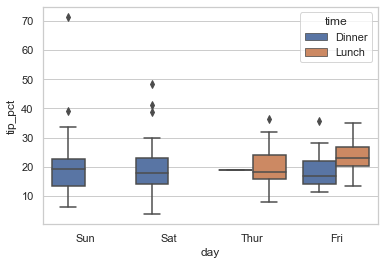

In [23]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

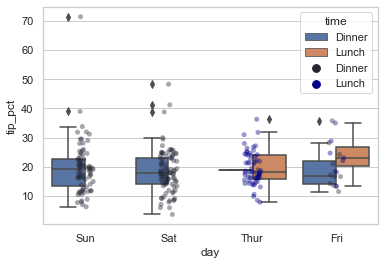

In [24]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Facet Grids y Categorical DataFrame

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

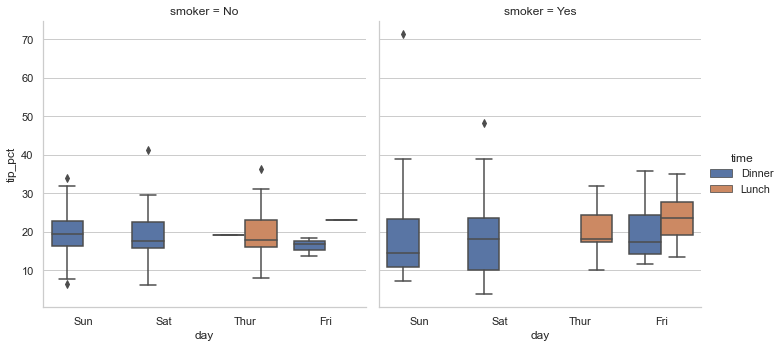

In [25]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

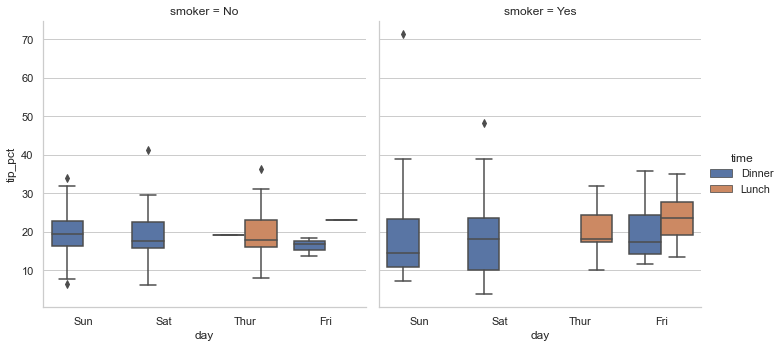

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

## Nivell 2 ##

### - Exercici 2 ###

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [70]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

movies = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat",
sep='::', encoding = 'ISO-8859-1', index_col=0, names=['TitleYear','Genres'], engine='python')

movies.dataframeName = 'movies.csv'

movies.dropna(inplace = True) 
new = movies["Genres"].str.split("|", n = 3, expand = True)
movies["Genre1"]=new[0]
movies["Genre2"]=new[1]
movies["Genre3"]=new[2]
movies["Genre4"]=new[3]
movies.drop(columns =["Genres"], inplace = True) 
movies.head()

,TitleYear,Genre1,Genre2,Genre3,Genre4
1,Toy Story (1995),Animation,Children's,Comedy,None
2,Jumanji (1995),Adventure,Children's,Fantasy,None
3,Grumpier Old Men (1995),Comedy,Romance,None,None
4,Waiting to Exhale (1995),Comedy,Drama,None,None
5,Father of the Bride Part II (1995),Comedy,None,None,None


In [71]:
movies.shape

(3883, 5)

In [72]:
movies.ndim

2

In [73]:
movies.columns

Index(['TitleYear', 'Genre1', 'Genre2', 'Genre3', 'Genre4'], dtype='object')

In [74]:
movies.dtypes

TitleYear    object
Genre1       object
Genre2       object
Genre3       object
Genre4       object
dtype: object

In [75]:
movies.describe()

,TitleYear,Genre1,Genre2,Genre3,Genre4
count,3883,3883,1858,536,115
unique,3883,18,17,15,24
top,Toy Story (1995),Drama,Drama,Thriller,Thriller
freq,1,1176,381,120,39


In [76]:
round(movies.describe(include='all'), 3)

,TitleYear,Genre1,Genre2,Genre3,Genre4
count,3883,3883,1858,536,115
unique,3883,18,17,15,24
top,Toy Story (1995),Drama,Drama,Thriller,Thriller
freq,1,1176,381,120,39


In [77]:
movies.isnull().sum()/len(movies)

TitleYear    0.000000
Genre1       0.000000
Genre2       0.521504
Genre3       0.861962
Genre4       0.970384
dtype: float64

In [78]:
movies.TitleYear.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Tigerland (2000)', 'Two Family House (2000)',
       'Contender, The (2000)'], dtype=object)

In [79]:
movies.TitleYear.nunique()

3883

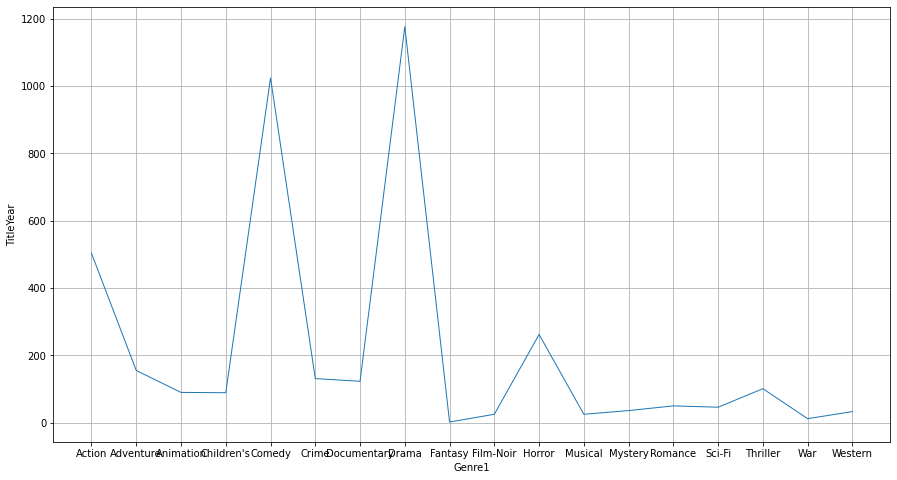

In [84]:
genresByTitleYear = movies[['Genre1', 'TitleYear']]
genresByTitleYear = genresByTitleYear.groupby(by='Genre1').count()
genresByTitleYear.head()
plt.figure(figsize=(15,8))
plt.grid(True)
sns.lineplot(x="Genre1", y="TitleYear", data=genresByTitleYear, palette="Set1", linewidth=1)
#plt.savefig("genresByTitleYear.png")
plt.show()

In [103]:
round((genresByTitleYear['TitleYear']).describe(), 3)

count      18.000
mean      215.722
std       343.553
min         2.000
25%        33.750
50%        89.500
75%       149.000
max      1176.000
Name: TitleYear, dtype: float64

In [102]:
genresByTitleYear.TitleYear.mean().round(3)

215.722

In [107]:
(genresByTitleYear.TitleYear.mean() - genresByTitleYear.TitleYear.std()).round(3)

-127.831

In [108]:
genresByTitleYear.TitleYear.iloc[[1], ]

Genre1
Adventure    155
Name: TitleYear, dtype: int64

In [109]:
genresByTitleYear.TitleYear.std().round(3)

343.553

Text(0.5, 0, '# Titles')

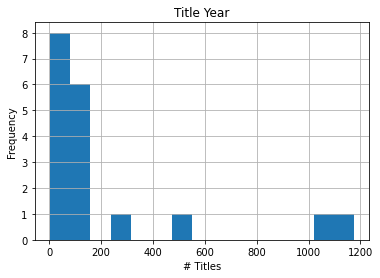

In [110]:
genresByTitleYear.hist(['TitleYear'], bins=15)
plt.title('Title Year')
plt.ylabel('Frequency')
plt.xlabel('# Titles')

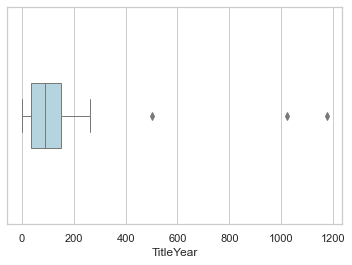

In [111]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = genresByTitleYear['TitleYear'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

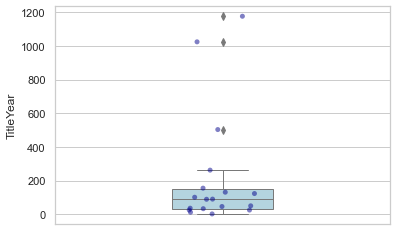

In [112]:
ax = sns.boxplot(y="TitleYear", data=genresByTitleYear,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=genresByTitleYear["TitleYear"], orient='v', color='darkblue', alpha= 0.5)

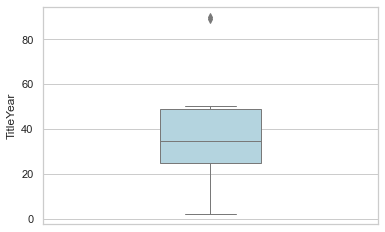

In [114]:
sns.boxplot(y="TitleYear", data=genresByTitleYear[genresByTitleYear.TitleYear < 100],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

In [120]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='Genre1', y='TitleYear', kind='box',
                 data=genresByTitleYear[genresByTitleYear.TitleYear < 245]);

ValueError: Could not interpret input 'Genre2'

In [ ]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='Genre1', y='TitleYear', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='Genre1', y='TitleYear', data=tips[tips.TitleYear < 245], orient='v', color='darkblue', alpha= 0.4);

## Nivell 3 ##

### - Exercici 3 ###

En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.